In [76]:
import pandas as pd
from prophet import Prophet
import numpy as np
import os
import sys
sys.path.append('../')
import config

In [88]:
df = pd.read_csv('../../data/data_daily_with_aqi.csv')

In [78]:
target = 'AQI'
city ='北京'
df_tgt = df[df.type==target].drop('type',axis=1)
df_tgt_ct = df_tgt[['date',city]].rename(columns={'date':'ds',city:'y'})

In [79]:
df_tgt_ct.head()

,ds,y
14680,2015-01-02,NaN
14675,2015-01-02,149.0
14670,2015-01-03,NaN
14665,2015-01-03,258.0
14660,2015-01-04,NaN


In [80]:
m = Prophet()
m.fit(df_tgt_ct)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/opt/homebrew/Caskroom/miniforge/base/lib/python3.9/site-packages/prophet/forecaster.py:896: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



Initial log joint probability = -27.8998


    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      43       3911.63   0.000775901       73.0833   8.919e-06       0.001       94  LS failed, Hessian reset 
      81        3911.8   0.000829072         105.1   1.116e-05       0.001      179  LS failed, Hessian reset 
      99       3911.83   1.45946e-05       61.9389      0.4968      0.4968      203   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     173       3911.91   5.51601e-07       79.5214           1           1      300   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


In [81]:
future = m.make_future_dataframe(periods=15)
future.tail()

,ds
2610,2022-04-13
2611,2022-04-14
2612,2022-04-15
2613,2022-04-16
2614,2022-04-17


In [82]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()


/opt/homebrew/Caskroom/miniforge/base/lib/python3.9/site-packages/prophet/forecaster.py:896: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/opt/homebrew/Caskroom/miniforge/base/lib/python3.9/site-packages/prophet/forecaster.py:896: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



,ds,yhat,yhat_lower,yhat_upper
2610,2022-04-13,47.612849,-32.956691,131.871291
2611,2022-04-14,52.924719,-33.948960,139.987425
2612,2022-04-15,50.273932,-32.985138,132.932049
2613,2022-04-16,55.628328,-31.354903,134.841569
2614,2022-04-17,45.913426,-37.679453,129.637180


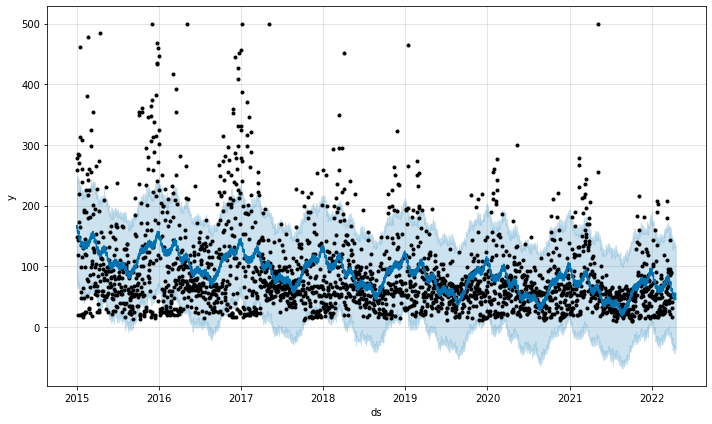

In [83]:
fig1 = m.plot(forecast)


/opt/homebrew/Caskroom/miniforge/base/lib/python3.9/site-packages/prophet/forecaster.py:896: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/opt/homebrew/Caskroom/miniforge/base/lib/python3.9/site-packages/prophet/forecaster.py:896: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



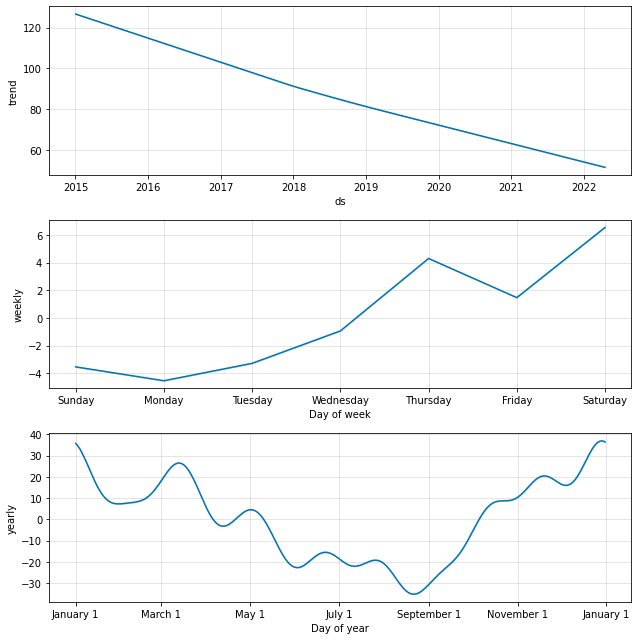

In [84]:
fig2 = m.plot_components(forecast)


In [85]:
from prophet.plot import plot_plotly, plot_components_plotly

plot_plotly(m, forecast)

In [86]:
plot_components_plotly(m, forecast)


/opt/homebrew/Caskroom/miniforge/base/lib/python3.9/site-packages/prophet/forecaster.py:896: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/opt/homebrew/Caskroom/miniforge/base/lib/python3.9/site-packages/prophet/forecaster.py:896: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

